<a href="https://colab.research.google.com/github/JARACH-209/Deep_Learning/blob/main/Stacked_Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Autoencoder!


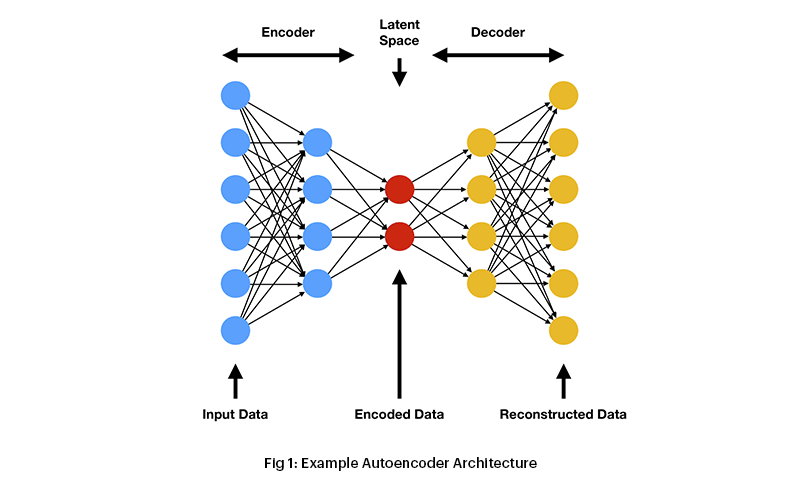

##Now, what is **stacked** autoencoder ?

DO NOT confuse with DEEP!

(A lot of articles, tuts, and other will sell DEEP autoencoders in name of Stacked AE)


In 2010 Stacked Deno-AE paper, Stacking was referred to the use of multiple layers. Deep Networks exists after 2011.

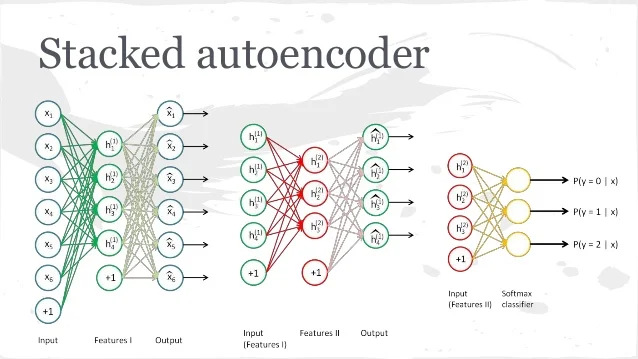




## Stack Any kind of AE

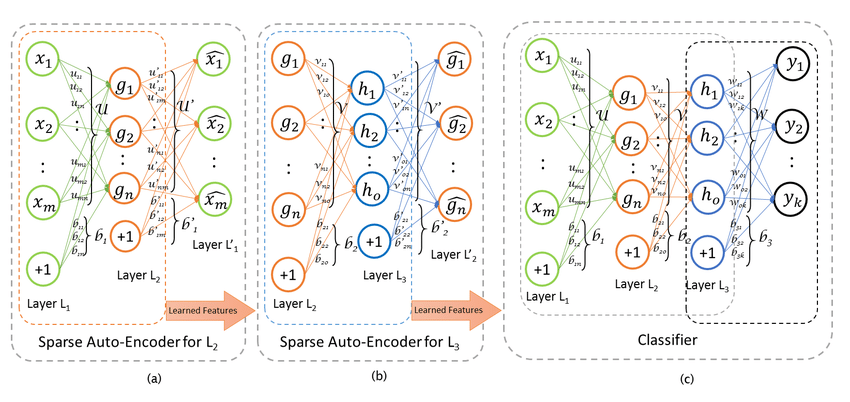

##Training an AE

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

from IPython.display import SVG
from tensorflow.keras.utils import plot_model
from PIL import Image

tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
latent_dim = 64 

class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
                    layers.Flatten(),
                    layers.Dense(latent_dim, activation='relu'),
                    ])
    self.decoder = tf.keras.Sequential([
                    layers.Dense(784, activation='sigmoid'),
                    layers.Reshape((28, 28))
                    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Autoencoder(latent_dim)


In [ ]:
autoencoder.compile(metrics = 'accuracy',optimizer='adam', loss=losses.MeanSquaredError())

history = autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 9s 3ms/step - loss: 0.0240 - accuracy: 0.1175 - val_loss: 0.0133 - val_accuracy: 0.1577
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0117 - accuracy: 0.1758 - val_loss: 0.0107 - val_accuracy: 0.1932
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0102 - accuracy: 0.1978 - val_loss: 0.0099 - val_accuracy: 0.2064
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0096 - accuracy: 0.2075 - val_loss: 0.0095 - val_accuracy: 0.2129
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0092 - accuracy: 0.2140 - val_loss: 0.0097 - val_accuracy: 0.2164
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0091 - accuracy: 0.2174 - val_loss: 0.0091 - val_accuracy: 0.2191
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0089 - accuracy: 0.2194 - val_loss: 0.0090 - val_accuracy:

In [ ]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

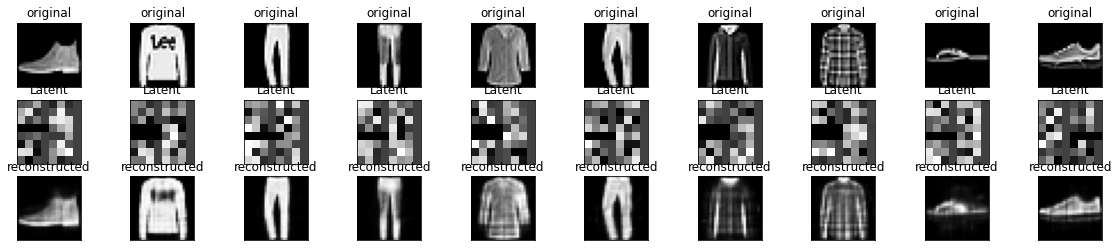

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display original
    ax = plt.subplot(3, n, i + 1 + n)
    im = Image.fromarray(encoded_imgs[i].reshape(8,8), 'L')
    plt.imshow(im)
    plt.title("Latent")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + n +n)
    plt.imshow(decoded_imgs[i])
    plt.title("reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
# SVG(model_to_dot(autoencoder).create(prog='dot', format='svg'))
plot_model(autoencoder)

dict_keys(['loss', 'val_loss'])


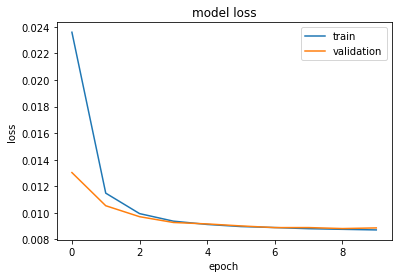

In [ ]:
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

##Training a simple CNN for classification

In [ ]:
#Flower Dataset
'''
batch_size = 32
img_height = 180 
img_width = 180

# Flower dataset. But won't use it now.
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

image_count = len(list(data_dir.glob('*/*.jpg')))

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
'''

228827136/228813984 [==============================] - 2s 0us/step
Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
'''
class_names = train_ds.class_names
print(class_names)
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")
'''

In [ ]:
'''
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
'''

In [ ]:
'''
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
#   layers.RandomFlip("horizontal",input_shape=(img_height, img_width, 3)),
#   layers.RandomRotation(0.1),
#   layers.RandomZoom(0.1),
  layers.Conv2D(8, 3, padding='same', activation='silu'),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='silu'),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 1, padding='same', activation='silu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='silu'),
  layers.MaxPooling2D(),

  # Having these Conv layers of 1x1x32 + Maxooling for feature map reduction
  # helps avoid overfitting and gives a lot better performance. Nice.
  # Reduces number of trainaible param by a lot. 3M to only 100K.
  layers.Conv2D(32, 1, padding='same', activation='silu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='silu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
plot_model(model)
'''

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


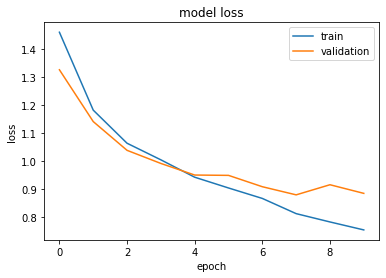

In [ ]:
#For Flower
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
#Using Fashion-Mnist
img_height = 28 
img_width = 28
num_classes = 10

In [25]:
model = Sequential([
#   layers.RandomFlip("horizontal",input_shape=(img_height, img_width, 3)),
#   layers.RandomRotation(0.1),
#   layers.RandomZoom(0.1),
  layers.Flatten(),
  layers.Dense(128, activation='silu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# plot_model(model)

In [27]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 128)               100480    
                                                                 
 dense_13 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [26]:
history = model.fit(x_train,y_train,
                    validation_data=(x_test,y_test),
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 4ms/step - loss: 0.4857 - accuracy: 0.8285 - val_loss: 0.4324 - val_accuracy: 0.8442
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3618 - accuracy: 0.8685 - val_loss: 0.4116 - val_accuracy: 0.8489
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3221 - accuracy: 0.8824 - val_loss: 0.3672 - val_accuracy: 0.8653
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2986 - accuracy: 0.8885 - val_loss: 0.3468 - val_accuracy: 0.8746
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2795 - accuracy: 0.8960 - val_loss: 0.3374 - val_accuracy: 0.8781
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2642 - accuracy: 0.9011 - val_loss: 0.3494 - val_accuracy: 0.8783
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2498 - accuracy: 0.9063 - val_loss: 0.3417 - val_accuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


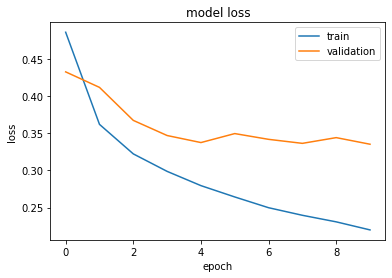

In [29]:
#For F-Mnist
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

##Training a CNN based classfier using AE

In [ ]:
#For flower dataset
'''
latent_dim = 128 

ae_model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    #   layers.RandomFlip("horizontal",input_shape=(img_height, img_width, 3)),
    #   layers.RandomRotation(0.1),
    #   layers.RandomZoom(0.1),

    #encoder
    layers.Conv2D(8, 3, padding='same', activation='silu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16, 3, padding='same', activation='silu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16, 1, padding='same', activation='silu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='silu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 1, padding='same', activation='silu'),
    layers.MaxPooling2D(),

    #latent
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='silu'),
    layers.Dense(800,activation='silu'),
    layers.Reshape((5,5,32)),

    #decoder
    layers.UpSampling2D(),
    layers.Conv2D(32, 1, padding='same', activation='silu'),
    layers.UpSampling2D(),
    layers.Conv2D(32, 3, padding='same', activation='silu'),
    layers.UpSampling2D(),
    layers.Conv2D(16, 1, padding='same', activation='silu'),
    layers.UpSampling2D(),
    layers.Conv2D(16, 3, padding='same', activation='silu'),
    layers.UpSampling2D(),
    layers.Conv2D(8, 3, padding='same', activation='silu'),
    layers.Conv2D(3, 3, padding='same', activation='silu'),
    layers.Resizing(180,180),
    #   layers.Dropout(0.2),
    #   layers.Flatten(),
    #   layers.Dense(128, activation='silu'),
    #   layers.Dense(num_classes)
])

ae_model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError())
plot_model(ae_model)
'''

In [ ]:
ae_model.summary()

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_42 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_251 (Conv2D)         (None, 180, 180, 8)       224       
                                                                 
 max_pooling2d_157 (MaxPooli  (None, 90, 90, 8)        0         
 ng2D)                                                           
                                                                 
 conv2d_252 (Conv2D)         (None, 90, 90, 16)        1168      
                                                                 
 max_pooling2d_158 (MaxPooli  (None, 45, 45, 16)       0         
 ng2D)                                                           
                                                                 
 conv2d_253 (Conv2D)         (None, 45, 45, 16)      

###Training an AE 

In [43]:
latent_dim = 32
autoencoder = Sequential([
    #Encoder
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='silu'),

    #Latent
    layers.Dense(latent_dim,activation='silu'),

    #Decoder
    layers.Dense(128,activation='silu'),
    layers.Dense(784,activation='silu'),
    layers.Reshape((28,28))
])

autoencoder.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              )

In [44]:
epochs = 10
aehistory = autoencoder.fit(x_train,x_train,validation_data=(x_test,x_test),epochs=epochs)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0214 - val_loss: 0.0151
Epoch 2/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0142 - val_loss: 0.0134
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0131 - val_loss: 0.0130
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0126 - val_loss: 0.0125
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0122 - val_loss: 0.0122
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0119 - val_loss: 0.0118
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0117 - val_loss: 0.0118
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0116 - val_loss: 0.0118
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0115 - val_loss: 0.0114
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.011

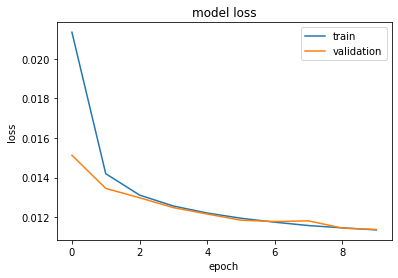

In [45]:
plt.plot(aehistory.history['loss'])
plt.plot(aehistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

###Using Latent Rep for Classification

In [75]:
# Taking only the encoder part of trained autoencoder
num_classes = 10

encoder = Model(inputs = autoencoder.input,outputs=autoencoder.layers[-4].output)
encoder.trainable = False

ae_model = Sequential([
        encoder,
        layers.Dense(64,activation='silu'),
        layers.Dense(64,activation='silu'),
        layers.Dense(num_classes)
])

ae_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
ae_model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_15 (Functional)       (None, 32)                104608    
                                                                 
 dense_51 (Dense)            (None, 64)                2112      
                                                                 
 dense_52 (Dense)            (None, 64)                4160      
                                                                 
 dense_53 (Dense)            (None, 10)                650       
                                                                 
Total params: 111,530
Trainable params: 6,922
Non-trainable params: 104,608
_________________________________________________________________


In [76]:
history = ae_model.fit(x_train,y_train,
                    validation_data=(x_test,y_test),
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.5770 - accuracy: 0.7893 - val_loss: 0.4856 - val_accuracy: 0.8272
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4327 - accuracy: 0.8422 - val_loss: 0.4561 - val_accuracy: 0.8344
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4040 - accuracy: 0.8511 - val_loss: 0.4216 - val_accuracy: 0.8480
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3851 - accuracy: 0.8571 - val_loss: 0.4093 - val_accuracy: 0.8491
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3717 - accuracy: 0.8626 - val_loss: 0.4097 - val_accuracy: 0.8497
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3624 - accuracy: 0.8658 - val_loss: 0.3962 - val_accuracy: 0.8556
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3527 - accuracy: 0.8702 - val_loss: 0.4002 - val_accuracy:

* PCA is essentially a linear transformation but Auto-encoders are capable of modelling complex non linear functions.
* PCA features are totally linearly uncorrelated with each other since features are projections onto the orthogonal basis. But autoencoded features might have correlations since they are just trained for accurate reconstruction.
* PCA is faster and computationally cheaper than autoencoders.
* A single layered autoencoder with a linear activation function is very similar to PCA.
* Autoencoder is prone to overfitting due to high number of parameters. (though regularization and careful design can avoid this)